<a href="https://colab.research.google.com/github/rahulbaburaj1/Machine-learning/blob/master/new_123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
os.chdir('/content/drive/MyDrive')

In [4]:
import tensorflow as tf

In [5]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from matplotlib import pyplot as plt


In [6]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Visualize the model
base_model.summary()

83683744/83683744 [==============================] - 0s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                   

In [7]:
for layer in base_model.layers:
    layer.trainable = False

In [8]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)  # Add an additional dense layer here
output = Dense(2, activation='softmax')(x)

In [9]:
model = Model(inputs=base_model.input, outputs=output)

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
train_dir ='/content/drive/MyDrive/Internship neural/TRAIN'
validation_dir ='/content/drive/MyDrive/Internship neural/TEST'

In [12]:
train_datagen = ImageDataGeneratortrain_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,  # Randomly rotate images by 20 degrees
    zoom_range=0.2,  # Randomly zoom images by 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    vertical_flip=True  # Randomly flip images vertically
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [15]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',  # Change 'val_loss' to 'val_accuracy'
    patience=5,
    restore_best_weights=True
)



Found 7149 images belonging to 2 classes.
Found 2230 images belonging to 2 classes.


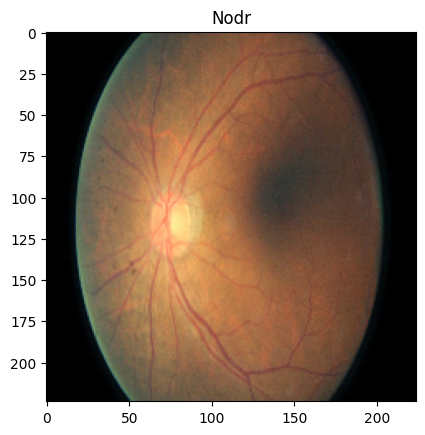

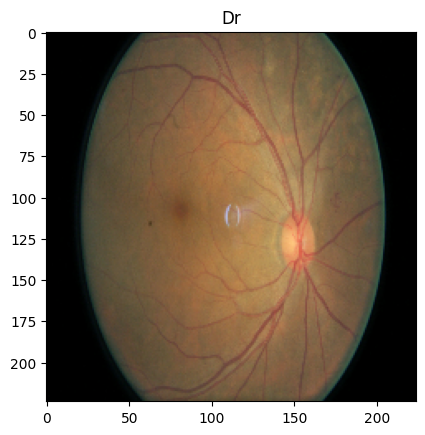

In [16]:
from matplotlib import image as mpimg
import os
for link in os.listdir(train_dir):
  lk=train_dir+'/'+link
  for lk1 in os.listdir(lk+'/'):
    path=lk+'/'+lk1
    img=mpimg.imread(path)
    plt.imshow(img)
    plt.title(link[:])
    plt.show()
    break

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=40,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping]
)

Epoch 1/40
446/446 [==============================] - 2285s 5s/step - loss: 0.6873 - accuracy: 0.5709 - val_loss: 0.7067 - val_accuracy: 0.5432
Epoch 2/40
446/446 [==============================] - 2051s 5s/step - loss: 0.6730 - accuracy: 0.5936 - val_loss: 0.6642 - val_accuracy: 0.5899
Epoch 3/40
446/446 [==============================] - 2005s 4s/step - loss: 0.6669 - accuracy: 0.5926 - val_loss: 0.6600 - val_accuracy: 0.5935
